In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
data=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data=data.drop(columns='Unnamed: 2',axis=1)

In [4]:
data=data.drop(columns='Unnamed: 3',axis=1)

In [5]:
data.drop(columns='Unnamed: 4',axis=1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


F:\anaconda machine larning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam message')

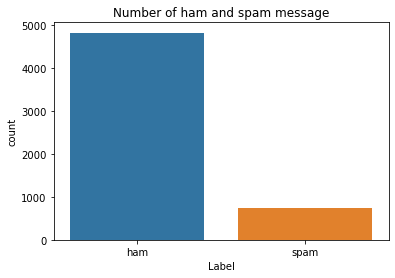

In [6]:
sns.countplot(data.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam message')

In [23]:
x=data.v2
y=data.v1
le=LabelEncoder()
y=le.fit_transform(y)
y=y.reshape(-1,1)
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=445)

In [9]:
max_word=1000
max_len=150
tok=Tokenizer(num_words=max_word)
tok.fit_on_texts(x_train)

In [10]:
x_train

3497    You said to me before i went back to bed that ...
1295                            TELL HER I SAID EAT SHIT.
1955    Aight I'll grab something to eat too, text me ...
5305    \Hi missed your Call and my mumHas beendroppin...
3956                    Where is that one day training:-)
                              ...                        
610     22 days to kick off! For Euro2004 U will be ke...
3951    Me hungry buy some food good lei... But mum n ...
2857    In life when you face choices Just toss a coin...
616     He like not v shock leh. Cos telling shuhui is...
2147    Ok. Can be later showing around 8-8:30 if you ...
Name: v2, Length: 4736, dtype: object

In [11]:
sequences=tok.texts_to_sequences(x_train)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
def RNN():
    inputs=Input(name='inputs',shape=[max_len])
    layer=Embedding(max_word,50,input_length=max_len)(inputs)
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)
    layer=Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    layer=Dense(1,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    model=Model(inputs=inputs,outputs=layer)
    return model


In [13]:
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [14]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
         validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Epoch 1/10
30/30 [==============================] - 10s 253ms/step - loss: 0.3146 - accuracy: 0.8794 - val_loss: 0.1284 - val_accuracy: 0.9800
Epoch 2/10
30/30 [==============================] - 7s 218ms/step - loss: 0.0758 - accuracy: 0.9799 - val_loss: 0.0682 - val_accuracy: 0.9863


In [15]:
test_sequences=tok.texts_to_sequences(x_test)
test_sequences_matrix=sequence.pad_sequences(test_sequences,maxlen=max_len)

In [16]:
accr=model.evaluate(test_sequences_matrix,y_test)

27/27 [==============================] - 1s 31ms/step - loss: 0.0735 - accuracy: 0.9809


In [17]:
Testing_context=["Oh k...I'm watiching here"]
txts=tok.texts_to_sequences(Testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)

In [18]:
preds=model.predict(txts)
print(preds)

[[0.00658998]]


In [19]:
Testing_context=["free offer is going for you a"]
txts=tok.texts_to_sequences(Testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)
preds=model.predict(txts)
print(preds)

[[0.2542147]]


In [20]:
Testing_context=["sir my name is arjun singh"]
txts=tok.texts_to_sequences(Testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)
preds=model.predict(txts)
print(preds)

[[0.01631448]]


In [21]:
Testing_context=["Free entry in 2 a wkly comp to win FA Cup fina."]
txts=tok.texts_to_sequences(Testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)
preds=model.predict(txts)
print(preds)

[[0.9561857]]


In [22]:
Testing_context=["This is the 2nd time we have tried 2 contact u."]
txts=tok.texts_to_sequences(Testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)
preds=model.predict(txts)
print(preds)

[[0.8104853]]
